# Where It Pays To Attend College


## Abstract:

This project attempts to answer the question, 'Where It Pays To Attend College?', based on a dataset of salaries of graduates from different colleges(school types). The school types in the data are Liberal Arts, Ivy League, Engineering, Party and State. The data was obtained from Wall Street Journal based on data from Payscale, Inc and can be obtained from www.kaggle.com

Exploratory data analysis(EDA) showed that the dataset has 269 rows and 8 columns; and no duplicate rows. The column names are school name, school type, starting median salary, mid-career median salary, mid-career salaries at the 10th, 25th, 75th and 90th percentiles. There are 38 rows with missing values at the mid-career 10th and 90th percentiles. Significant outliers were observed in some of the data distributions.

Data cleaning performed include replacement of missing values with the mean value of their distibutions. Outliers were removed before the average of the different data distributions were taken for comparisms. Visualizations using barplots were done to compare the average starting median and average mid-career median salaries across the school types. A lineplot was used to visualize the earning power across the school types at the 10th, 25th, 75th and 95th percentiles.

The analysis showed that at the start of career and at mid-career, graduates from Ivy League earned more than those from other colleges followed by those from Engineering. Ivy League graduates had the highest increase in wage from starting salary to mid-career salary, followed by Engineering and Liberal Arts. At the 10th and 25th percentiles, Ivy League and Enigneering earned about the same amount and more than other school types. At the 75th and 90th percetntiles, there is a sharp increase in salary for Ivy League graduates compared to other school types while graduates from Liberal Arts had a sharp decline in salary from the 75th to the 90th percentile.

From the data, it is safe to conclude that it pays more to attend an Ivy League. Enigneering seems promising at the start of career, but at mid-career, 90 percent of graduates earn significantly less than their contemporaries from Ivy League and a little above those from Party. At 90th percentile of mid-career salary, Liberal Arts is where it pays least to attend college.



In [13]:
# Import pandas, matplotlib and seaborn libraries for data cleaning and visualisation

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
%matplotlib inline

In [14]:
# Import the dataset

college_data = pd.read_excel('C:\\Users\\OSABOHIEN\\OneDrive\\Documents\\Data Science Class\\Projects\\Where It Pays To Attend College Datasets\\Dataset.xlsx', 
                   'Sheet 1', index_col=None, na_values=['NA'])

#### Meta Data :

The dataset has 269 rows and 8 columns.

No duplicate rows.

There are 38 rows with missing values, at the mid_career_10th_percentile_salary and mid_career_90th_percentile_salary columns of the dataset.

The school_name and the school_type columns are object data type; the mid_career_10th_percentile_salary and mid_career_90th_percentile_salary columns are float type objects(decimal) while the remaining columns are integer data type.


Missing values were replaced with the mean values of their distribution.

Outliers were removed before the average of the different data distributions were taken for comparisms.

The mid_career_10th_percentile_salary and mid_career_90th_percentile_salary columns were converted from decimal numbers to integers.

The school_type column was converted from object type to category type.

In [15]:
# Determine the number of rows and columns

college_data.shape

(269, 8)

In [16]:
# Drop duplicate rows if any

len(college_data.drop_duplicates())

269

In [17]:
# Determine the number of missing or null values if any acros the columns

college_data.isnull().sum()

school_name                           0
school_type                           0
starting_median_salary                0
mid_career_median salary              0
mid_career_10th_percentile_salary    38
mid_career_25th_percentile_salary     0
mid_career_75th_percentile_salary     0
mid_career_90th_percentile_salary    38
dtype: int64

In [18]:
# Replace missing values with the mean value of their distribution

college_data['mid_career_10th_percentile_salary']=college_data['mid_career_10th_percentile_salary'].fillna(
    college_data['mid_career_10th_percentile_salary'].mean())

In [19]:
# Replace missing values with the mean value of their distribution
college_data['mid_career_90th_percentile_salary']=college_data['mid_career_90th_percentile_salary'].fillna(
    college_data['mid_career_10th_percentile_salary'].mean())

In [20]:
# convert mid_career_10th_percentile_salary column from float to integer data type using astype() function

college_data['mid_career_10th_percentile_salary'] = college_data.mid_career_10th_percentile_salary.astype('int64')


In [21]:
# convert mid_career_90th_percentile_salary column from float to integer data type using astype() function

college_data['mid_career_90th_percentile_salary'] = college_data.mid_career_90th_percentile_salary.astype('int64')

In [22]:
# convert school_type column from object to category data type using astype() function

college_data['school_type'] = college_data.school_type.astype('category')

In [23]:
college_data.dtypes

school_name                            object
school_type                          category
starting_median_salary                  int64
mid_career_median salary                int64
mid_career_10th_percentile_salary       int64
mid_career_25th_percentile_salary       int64
mid_career_75th_percentile_salary       int64
mid_career_90th_percentile_salary       int64
dtype: object

In [24]:
college_data.head()

,school_name,school_type,starting_median_salary,mid_career_median salary,mid_career_10th_percentile_salary,mid_career_25th_percentile_salary,mid_career_75th_percentile_salary,mid_career_90th_percentile_salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200,126000,76800,99200,168000,220000
1,California Institute of Technology (CIT),Engineering,75500,123000,44250,104000,161000,44250
2,Harvey Mudd College,Engineering,71800,122000,44250,96000,180000,44250
3,"Polytechnic University of New York, Brooklyn",Engineering,62400,114000,66800,94300,143000,190000
4,Cooper Union,Engineering,62200,114000,44250,80200,142000,44250


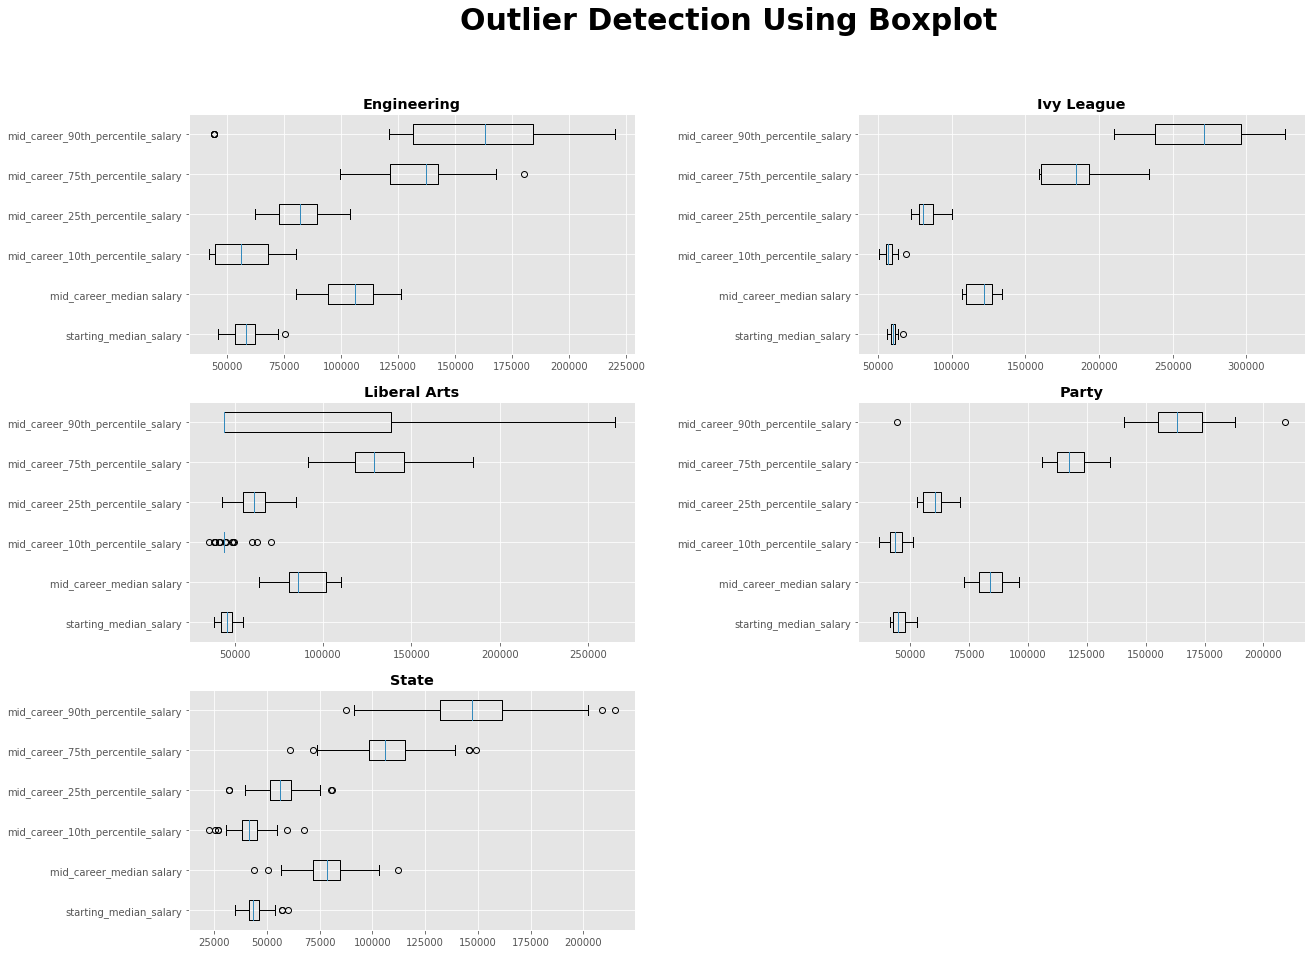

In [41]:
# Code for visualization using boxplot

plt.figure(1, (20,15))
plt.subplots_adjust(wspace=0.5)
plt.suptitle('Outlier Detection Using Boxplot', fontsize=30, fontweight='bold')


engineering = college_data[college_data['school_type']=='Engineering']
plt.subplot(3, 2, 1)
plt.boxplot([engineering['starting_median_salary'].values, engineering['mid_career_median salary'].values, engineering[
    'mid_career_10th_percentile_salary'].values, engineering['mid_career_25th_percentile_salary'].values, engineering[
    'mid_career_75th_percentile_salary'].values, engineering['mid_career_90th_percentile_salary'].values], labels=
           engineering.columns[2:], vert=False)
plt.title('Engineering', fontweight='bold')


ivy = college_data[college_data['school_type']=='Ivy League']
plt.subplot(3, 2, 2)
plt.boxplot([ivy['starting_median_salary'].values, ivy['mid_career_median salary'].values, ivy[
    'mid_career_10th_percentile_salary'].values, ivy['mid_career_25th_percentile_salary'].values, ivy[
    'mid_career_75th_percentile_salary'].values, ivy['mid_career_90th_percentile_salary'].values], labels=
           ivy.columns[2:], vert=False)
plt.title('Ivy League', fontweight='bold')


Arts = college_data[college_data['school_type']=='Liberal Arts']
plt.subplot(3, 2, 3)
plt.boxplot([Arts['starting_median_salary'].values, Arts['mid_career_median salary'].values, Arts[
    'mid_career_10th_percentile_salary'].values, Arts['mid_career_25th_percentile_salary'].values, Arts[
    'mid_career_75th_percentile_salary'].values, Arts['mid_career_90th_percentile_salary'].values], labels=
            Arts.columns[2:], vert=False)
plt.title('Liberal Arts', fontweight='bold')


Party = college_data[college_data['school_type']=='Party']
plt.subplot(3, 2, 4)
plt.boxplot([Party['starting_median_salary'].values, Party['mid_career_median salary'].values, Party[
    'mid_career_10th_percentile_salary'].values, Party['mid_career_25th_percentile_salary'].values, Party[
    'mid_career_75th_percentile_salary'].values, Party['mid_career_90th_percentile_salary'].values], labels=
           Party.columns[2:], vert=False)
plt.title('Party', fontweight='bold')


State = college_data[college_data['school_type']=='State']
plt.subplot(3, 2, 5)
plt.boxplot([State['starting_median_salary'].values, State['mid_career_median salary'].values, State[
    'mid_career_10th_percentile_salary'].values, State['mid_career_25th_percentile_salary'].values, State[
    'mid_career_75th_percentile_salary'].values, State['mid_career_90th_percentile_salary'].values], labels=
           State.columns[2:], vert=False)
plt.title('State', fontweight='bold')



plt.savefig('boxplots.png', bbox_inches='tight')


In [26]:
# Defined a function to detect and remove outliers using the interquantile range before the average of each distribution is 
# taken.

def mean_no_outlier(data):
    data = data.sort_values()
    Q1, Q3 = data.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    data = round(data[~((data < (Q1 - 1.5 * IQR))|(data > (Q1 + 1.5 *IQR)))].mean(), 2)
    return data

In [27]:
# Subset the data by school type and apply the mean_no_outlier function. Then merge the resulting dataframe.


engineering = engineering.iloc[:, 2:].apply(mean_no_outlier)
engineering = pd.DataFrame(engineering).reset_index()
engineering.columns=['salary', 'average']
engineering['school_type']='Engineering'



ivy = ivy.iloc[:, 2:].apply(mean_no_outlier)
ivy = pd.DataFrame(ivy).reset_index()
ivy.columns=['salary', 'average']
ivy['school_type']='Ivy'



Arts = Arts.iloc[:, 2:].apply(mean_no_outlier)
Arts = pd.DataFrame(Arts).reset_index()
Arts.columns=['salary', 'average']
Arts['school_type']='Arts'



Party = Party.iloc[:, 2:].apply(mean_no_outlier)
Party = pd.DataFrame(Party).reset_index()
Party.columns=['salary', 'average']
Party['school_type']='Party'



State = State.iloc[:, 2:].apply(mean_no_outlier)
State = pd.DataFrame(State).reset_index()
State.columns=['salary', 'average']
State['school_type']='State'


result_data = pd.concat([engineering, ivy, Arts, Party, State], ignore_index=True)

In [28]:
result_data.head(15)

,salary,average,school_type
0,starting_median_salary,56412.50,Engineering
1,mid_career_median salary,102611.11,Engineering
2,mid_career_10th_percentile_salary,56883.33,Engineering
3,mid_career_25th_percentile_salary,79005.88,Engineering
4,mid_career_75th_percentile_salary,128343.75,Engineering
5,mid_career_90th_percentile_salary,170000.00,Engineering
6,starting_median_salary,58983.33,Ivy
7,mid_career_median salary,120125.00,Ivy
8,mid_career_10th_percentile_salary,55200.00,Ivy
9,mid_career_25th_percentile_salary,80328.57,Ivy


In [29]:
result_data = result_data.pivot(index='school_type', columns='salary', values='average')

In [30]:
result_data.reset_index(inplace=True)

In [31]:
result_data

salary,school_type,mid_career_10th_percentile_salary,mid_career_25th_percentile_salary,mid_career_75th_percentile_salary,mid_career_90th_percentile_salary,mid_career_median salary,starting_median_salary
0,Arts,44250.00,58474.36,125770.73,64281.25,89378.72,44617.07
1,Engineering,56883.33,79005.88,128343.75,170000.00,102611.11,56412.50
2,Ivy,55200.00,80328.57,177000.00,261571.43,120125.00,58983.33
3,Party,42908.82,57768.75,116388.89,161812.50,82106.25,44966.67
4,State,40864.00,55040.79,104570.51,142854.19,76532.68,42984.31


In [32]:
result_data.columns.name = None

In [33]:
result_data.head()

,school_type,mid_career_10th_percentile_salary,mid_career_25th_percentile_salary,mid_career_75th_percentile_salary,mid_career_90th_percentile_salary,mid_career_median salary,starting_median_salary
0,Arts,44250.00,58474.36,125770.73,64281.25,89378.72,44617.07
1,Engineering,56883.33,79005.88,128343.75,170000.00,102611.11,56412.50
2,Ivy,55200.00,80328.57,177000.00,261571.43,120125.00,58983.33
3,Party,42908.82,57768.75,116388.89,161812.50,82106.25,44966.67
4,State,40864.00,55040.79,104570.51,142854.19,76532.68,42984.31


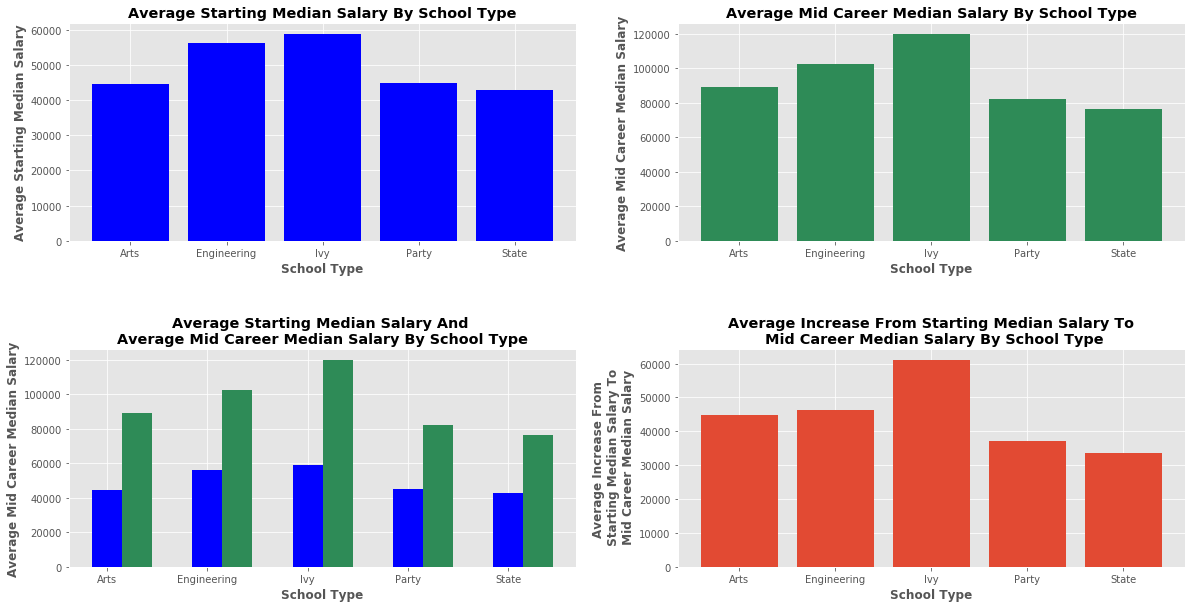

In [40]:
# Bar plots

plt.figure(1, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)



plt.subplot(2,2,1)
plt.bar(result_data['school_type'], result_data['starting_median_salary'].values, color='blue')
plt.xlabel('School Type', fontweight='bold')
plt.ylabel('Average Starting Median Salary', fontweight='bold')
plt.title('Average Starting Median Salary By School Type', fontweight='bold')


plt.subplot(2,2,2)
plt.bar(result_data['school_type'], result_data['mid_career_median salary'].values, color='seagreen')
plt.xlabel('School Type', fontweight='bold')
plt.ylabel('Average Mid Career Median Salary', fontweight='bold')
plt.title('Average Mid Career Median Salary By School Type', fontweight='bold')


plt.subplot(2,2,3)

bar_width = 0.3
pos = np.arange(len(result_data['school_type']))

plt.bar(pos, result_data['starting_median_salary'].values, bar_width, color='blue')
plt.bar(pos + bar_width, result_data['mid_career_median salary'].values, bar_width, color='seagreen')
plt.xticks(pos, result_data['school_type'])
plt.xlabel('School Type', fontweight='bold')
plt.ylabel('Average Mid Career Median Salary', fontweight='bold')
plt.title('Average Starting Median Salary And \nAverage Mid Career Median Salary By School Type', fontweight='bold')



plt.subplot(2,2,4)
plt.bar(result_data['school_type'], result_data['mid_career_median salary'].values - result_data['starting_median_salary'
                                                                                                ].values)
plt.xlabel('School Type', fontweight='bold')
plt.ylabel('Average Increase From\n Starting Median Salary To\n Mid Career Median Salary', fontweight='bold')
plt.title('Average Increase From Starting Median Salary To\n Mid Career Median Salary By School Type', fontweight='bold')

plt.savefig('barplots.png', bbox_inches='tight')

In [35]:
data_percentile = result_data.melt(id_vars='school_type', var_name='Percentile', value_name='Average Salary').iloc[:20, :]

In [36]:
data_percentile.head(8)

,school_type,Percentile,Average Salary
0,Arts,mid_career_10th_percentile_salary,44250.00
1,Engineering,mid_career_10th_percentile_salary,56883.33
2,Ivy,mid_career_10th_percentile_salary,55200.00
3,Party,mid_career_10th_percentile_salary,42908.82
4,State,mid_career_10th_percentile_salary,40864.00
5,Arts,mid_career_25th_percentile_salary,58474.36
6,Engineering,mid_career_25th_percentile_salary,79005.88
7,Ivy,mid_career_25th_percentile_salary,80328.57


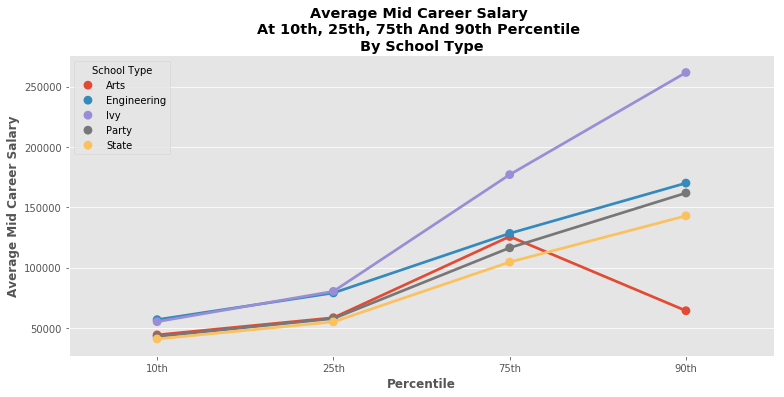

In [39]:
sns.catplot(x='Percentile', y='Average Salary', hue='school_type', kind='point', data=data_percentile, aspect=2.2, legend=False)
plt.xticks(np.arange(4), ('10th', '25th', '75th', '90th'))
plt.legend(title='School Type')
plt.xlabel('Percentile', fontweight='bold')
plt.ylabel('Average Mid Career Salary', fontweight='bold')
plt.title('Average Mid Career Salary \nAt 10th, 25th, 75th And 90th Percentile \nBy School Type', fontweight='bold')
plt.savefig('lineplot.png', bbox_inches='tight')

### Conclusion:

It pays more to attend an Ivy League.